### A few caveats to bear in mind with Google Trends
  - Google provides *sampled* data, so if you pull the same data twice there may be a small amount of variability.
  - The data is scaled, so that the maximum value in any requested dataset will be 100. So if you separately pull reports for different keywords, you won't be able to tell relative popularity between them (but you can pull multiple keywords at a time to compare their search interest directly).
  - The search interest values provided are NOT the same as search *volume*. They are search interest *relative to all Google searches* during the time period and geography you are requesting. Since the overall usage of Google has grown over the years, this means that a search term that has constant search *volume* will show up as having decreasing search *interest* over time (see section at end of notebook).


In [1]:
from pytrends.request import TrendReq
import pytrends
%matplotlib inline

# set a nice plotting style
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# with open('credentials.txt', 'r') as f:
#     username, password = f.read().splitlines() 

# connector = TrendReq(username, password)
# issue: not able to sign in

# buildt the connector without signing in
connector = TrendReq(hl='en-US', tz=360)

### start searching
Build a payload and put the keywords that we want to track in it.

In [36]:
my_search_terms = ['clean beauty', 'green beauty', 'clean cosmetics']  # list with up to 5 items

connector.build_payload(my_search_terms)
df = connector.interest_over_time()

In [4]:
# return a Pandas DataFrame
df.head()

,clean beauty,green essence,clean cosmetics,isPartial
date,,,,
2015-04-12,27,15,0,False
2015-04-19,33,7,3,False
2015-04-26,22,9,4,False
2015-05-03,19,4,3,False
2015-05-10,24,3,7,False


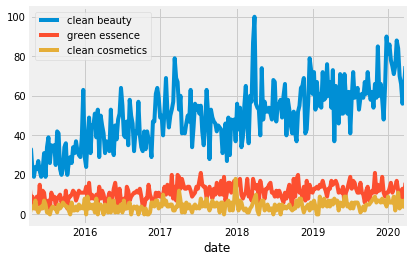

In [5]:
df.plot()

In [10]:
connector.build_payload?

### building advanced search
By default the `build_payload()` method will give you 5 years of worldwide data, with no filters applied on search type or category. The categories we may be interested in are as followed:
- Beauty & Fitness -> 44
- Face & Body Care -> 143
- Make-Up & Cosmetics -> 234
- Skin & Nail Care -> 93
- For other categories available, see [here](https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)

Similary, the default setting of `gprop=''` gives you regular Web Search data. You can filter to other types of searches by setting `gprop` to:
- 'images'
- 'news'
- 'youtube'
- 'froogle' (Google Shopping)

Geography can be specified with the `geo` parameter, e.g. `geo='US'` will give you search interest in the U.S. In our case, we may want to use `geo='FR'`.

Timeframe is a bit tricky. If you need to be more specific than the default 5 year window, I recommend giving custom start and end dates. The structure for this is to set the `timeframe` parameter to a string with a space between start and end dates: `'yyyy-mm-dd yyyy-mm-dd'`.

In [27]:
# Google regular web searches for clean cosmetics in US for last two years
connector.build_payload(my_search_terms, geo='US', timeframe='2018-03-31 2020-03-31')
# it seems that not putting anything in the category variable is better

In [10]:
connector.categories()

{'children': [{'children': [{'name': 'Celebrities & Entertainment News',
     'id': 184},
    {'children': [{'name': 'Animated Films', 'id': 1104},
      {'name': 'Anime & Manga', 'id': 317},
      {'name': 'Cartoons', 'id': 319},
      {'name': 'Comics', 'id': 318}],
     'name': 'Comics & Animation',
     'id': 316},
    {'children': [{'children': [{'name': 'Film & TV Awards', 'id': 1108},
        {'name': 'Film & TV Production', 'id': 1117}],
       'name': 'Film & TV Industry',
       'id': 1116},
      {'children': [{'name': 'Music Awards', 'id': 1113},
        {'name': 'Record Labels', 'id': 1114}],
       'name': 'Recording Industry',
       'id': 1115}],
     'name': 'Entertainment Industry',
     'id': 612},
    {'children': [{'name': 'Clubs & Nightlife', 'id': 188},
      {'name': 'Concerts & Music Festivals', 'id': 891},
      {'name': 'Film Festivals', 'id': 1086},
      {'name': 'Live Sporting Events', 'id': 1273},
      {'name': 'Movie Listings & Theater Showtimes', 'id':

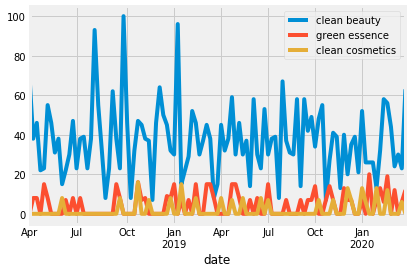

In [19]:
# see the line chart
df = connector.interest_over_time()
df.plot()

In [37]:
df_regional = connector.interest_by_region()
df_regional

,clean beauty,green beauty,clean cosmetics
geoName,,,
Alabama,48,52,0
Alaska,0,0,0
Arizona,41,59,0
Arkansas,38,62,0
California,53,43,4
Colorado,49,51,0
Connecticut,51,49,0
Delaware,0,0,0
District of Columbia,0,0,0


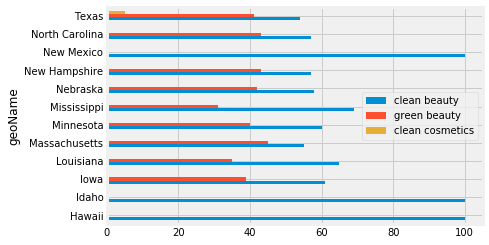

In [39]:
# see keyword "clean beauty" are more popular in which regions
df_top_regions = df_regional.loc[df_regional['clean beauty'] > df_regional['clean beauty'].quantile(0.75)]
df_top_regions.plot.barh()


## Related search terms
Terms that are frequently searched for (in the same session) with the search term you provided. 
- `top` gives the most popular related terms in the same timeframe/geography.
- `rising` gives the terms that had the highest growth compared with the previous time period.

In [40]:
related = connector.related_queries()
related.keys()

dict_keys(['clean beauty', 'green beauty', 'clean cosmetics'])

In [41]:
related['clean beauty'].keys()

dict_keys(['top', 'rising'])

In [42]:
related['clean beauty']['top'].head(10)

,query,value
0,clean beauty blender,100
1,beauty blender,97
2,clean a beauty blender,44
3,how to clean a beauty blender,40
4,clean beauty products,9
5,how to clean your beauty blender,8
6,how to clean beauty blenders,8
7,clean beauty blender microwave,8
8,sephora clean beauty,7
9,how to clean beauty sponge,6


In [43]:
related['clean beauty']['rising'].head(10)

,query,value
0,how to clean beauty blenders,262800
1,clean beauty blender microwave,258850
2,clean beauty blender in microwave,164900
3,how to clean beauty blender in microwave,146150
4,how do you clean a beauty blender,100150
5,goop clean beauty,91900
6,how to clean beauty blender diy,69950
7,beauty counter,62100
8,best clean beauty brands,56850
9,how to clean beauty sponges,51500


In [44]:
related_topics = connector.related_topics()
related_topics.keys()

dict_keys([])

# Keyword Suggestions

In [45]:
key_word = "drunk elephant"

In [46]:
sugg_dict = TrendReq().suggestions(key_word)
for number in range(0,len(sugg_dict)):
    print("\n".join("{}\t{}".format(k, v) for k, v in sugg_dict[number].items()))
    print("")

mid	/g/11g69pkqsh
title	Drunk Elephant T.L.C. Sukari Babyfacial
type	Topic

mid	/g/11cn2lstgj
title	Drunk Elephant C-Firma Day Serum
type	Topic

mid	/g/11cm47nylx
title	Drunk Elephant Virgin Marula Luxury Facial Oil
type	Topic

mid	/g/11bzwndw51
title	Drunk Elephant Lala Retro Whipped Cream
type	Topic

mid	/g/11c2kn2cmx
title	Drunk Elephant Shaba Complex Eye Serum
type	Topic

